# <div align = 'center'>**Linear Regression**</div>

---

### **1. What is Linear Regression?**
Linear Regression is a **supervised learning algorithm** used for **predicting continuous values**. It models the relationship between a **dependent variable** (target) and one or more **independent variables** (features) by fitting a straight line (or hyperplane in higher dimensions) to the data.

   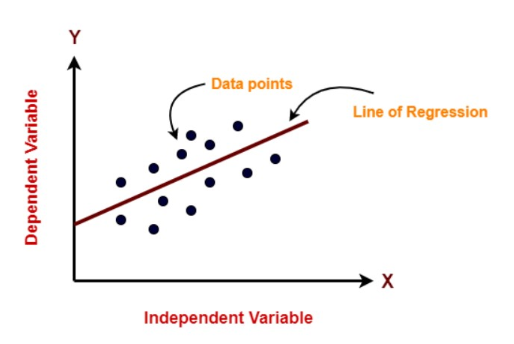

   

---

### **2. Key Concepts**

#### **2.1 Simple Linear Regression**
- Involves **one independent variable** and one dependent variable.
- The relationship is modeled as:
  
  $$
  y = \beta_0 + \beta_1x + \epsilon
  $$

  Where:
  - $ y $: Dependent variable (target).
  - $ x $: Independent variable (feature).
  - $ \beta_0 $: Intercept (value of $ y $ when $ x = 0 $).
  - $ \beta_1 $: Slope of the line (rate of change of $ y $ with respect to $ x $).
  - $ \epsilon $: Error term (residual).

#### **2.2 Multiple Linear Regression**
- Involves **multiple independent variables**.
- The relationship is modeled as:
  $$
  y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p + \epsilon
  $$
  Where:
  - $ x_1, x_2, \dots, x_p $: Independent variables (features).
  - $ \beta_1, \beta_2, \dots, \beta_p $: Coefficients of the independent variables.

---

### **3. Objective**
The primary goal of Linear Regression is to find the **best-fit line** (or hyperplane) that minimizes the error between the **predicted values** and the **actual values**. This is achieved by minimizing the **cost function**.

---

### **4. Cost Function**
The cost function for Linear Regression is the **Mean Squared Error (MSE)**:
$$
J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\beta(x^{(i)}) - y^{(i)} \right)^2
$$
Where:
- $ m $: Number of training examples.
- $ h_\beta(x) $: Predicted value (hypothesis).
- $ y $: Actual value.

---

### **5. How Linear Regression Works**
1. **Initialize Parameters**:
   - Start with random values for the coefficients ($ \beta_0, \beta_1, \dots, \beta_p $).

2. **Compute Predictions**:
   - Use the current parameters to compute predictions:
     $$
     h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p
     $$

3. **Calculate the Cost**:
   - Compute the cost function $ J(\beta) $ to measure the error.

4. **Optimize Parameters**:
   - Use optimization algorithms like **Gradient Descent** to minimize the cost function and update the parameters.

5. **Repeat Until Convergence**:
   - Continue updating the parameters until the cost function converges.

---

### **6. Applications of Linear Regression**
1. **Predictive Modeling**:
   - Predicting house prices, stock prices, or sales revenue.
2. **Trend Analysis**:
   - Analyzing trends in data over time.
3. **Risk Assessment**:
   - Estimating risks in finance or insurance.
4. **Medical Research**:
   - Modeling relationships between variables (e.g., weight vs. height).

---

### **7. Advantages**
1. **Simplicity**:
   - Easy to implement and interpret.
2. **Efficiency**:
   - Works well for small to medium-sized datasets.
3. **Explainability**:
   - Provides clear insights into the relationship between variables.

---

### **8. Disadvantages**
1. **Assumptions**:
   - Assumes a linear relationship between variables, which may not always hold.
2. **Outliers**:
   - Sensitive to outliers, which can distort the model.
3. **Overfitting**:
   - May overfit if there are too many features relative to the number of data points.

---

### **9. Python Implementation**

Here’s an example of implementing Linear Regression using Python:



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### 9.1 Load and Explore the Dataset

In [2]:
# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values="?")



# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

/tmp/ipykernel_51564/1208690752.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values="?")


Dataset Preview:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# Check the shape of the dataset
print(f"\nShape of the Dataset: {df.shape}")

# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Shape of the Dataset: (398, 9)

Missing Values in the Dataset:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


#### 9.2 Exploratory Data Analysis

In [4]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


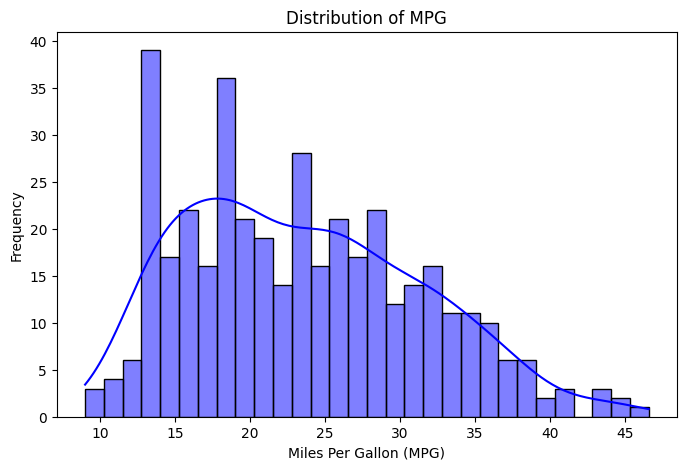

In [5]:
# Visualize the distribution of the target variable (mpg)
plt.figure(figsize=(8, 5))
sns.histplot(df['mpg'], kde=True, color='blue', bins=30)
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show()

#### 9.3 Preprocessing

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'horsepower' to numeric (if not already)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Verify that there are no missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [7]:
# Select features and target variable
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]  # Features
y = df['mpg']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"\nTraining Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Set Shape: {X_test.shape}, {y_test.shape}")


Training Set Shape: (313, 5), (313,)
Testing Set Shape: (79, 5), (79,)


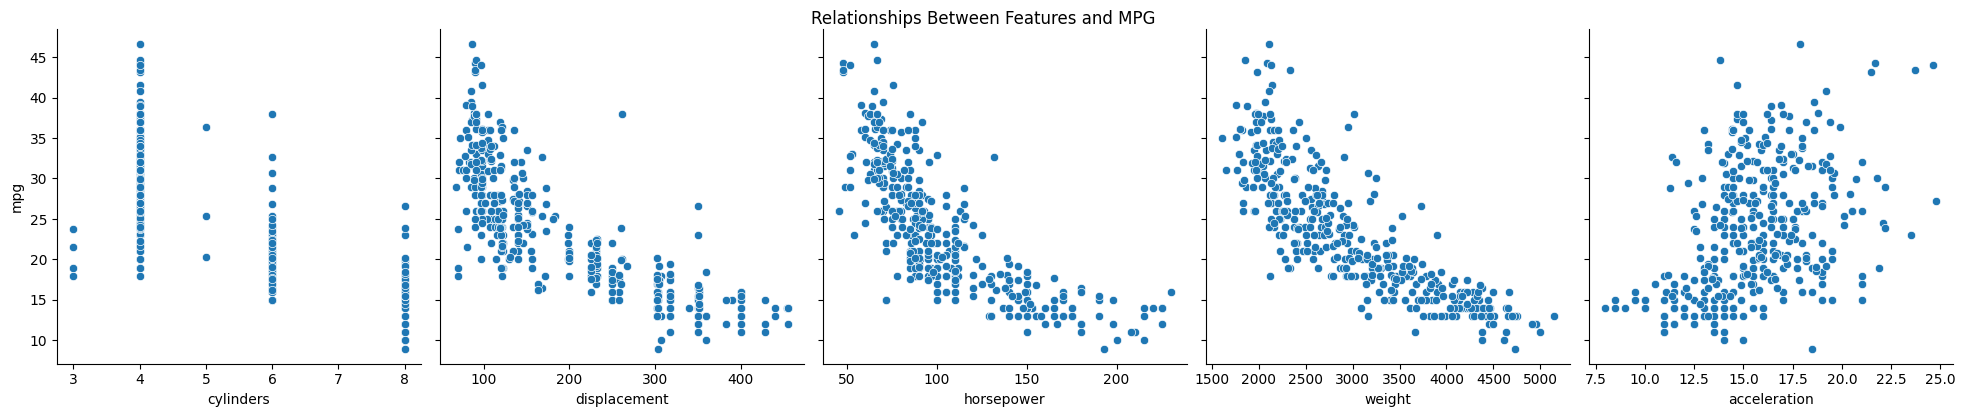

In [8]:
# Visualize the relationships between features and the target variable
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars='mpg', height=4, aspect=1, kind='scatter')
plt.suptitle('Relationships Between Features and MPG', y=1.02)
plt.show()

#### 9.4 Train the Linear Regression Model

In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Print the intercept
print(f"\nIntercept: {model.intercept_}")


Model Coefficients:
        Feature  Coefficient
0     cylinders    -0.175808
1  displacement    -0.006713
2    horsepower    -0.048908
3        weight    -0.004992
4  acceleration    -0.060449

Intercept: 46.837105072120536


#### 9.5 Model Evaluation

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print evaluation metrics
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 3.49
Mean Squared Error (MSE): 17.94
R² Score: 0.65


#### 9.6 Visualize the Prediction

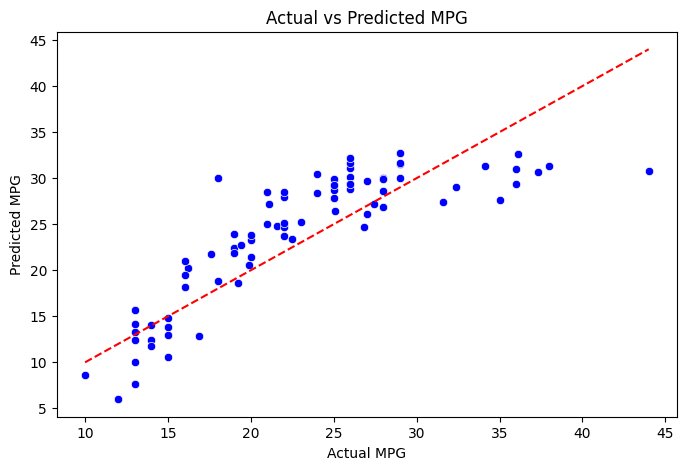

In [11]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()